# WeatherPy

In [ ]:
!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

Call current weather data for ONE location: <br>
api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

In [3]:
# Check if URL and API key works for the city of London...
test_url = f'http://api.openweathermap.org/data/2.5/weather?q=london&appid={weather_api_key}'
test_response = requests.get(test_url)
print(test_response)

<Response [200]>


In [4]:
# Check json format
test_response.json()

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 277.31,
  'feels_like': 273.64,
  'temp_min': 276.48,
  'temp_max': 278.15,
  'pressure': 1028,
  'humidity': 52},
 'visibility': 10000,
 'wind': {'speed': 1.54, 'deg': 0},
 'clouds': {'all': 90},
 'dt': 1615114539,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1615098752,
  'sunset': 1615139446},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [6]:
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [7]:
# set up lists to hold reponse info
name = []
lat = []
lng = []
temp_max = []
humidity = []
clouds = []
wind_speed = []
country = []
dt = []

# log count
count = 0
set_count = 1

In [8]:
print('''
Beginning Data Retrieval
------------------------------------------------
''')

# Loop through the list of cities and perform a request for data
# Handle exceptions for a city that is not available in the WeatherMap API
for city in cities:
    
    response = requests.get(query_url + city).json()
    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
             
        count += 1
        print(f'Processing Record {count} | {city}')

    except:
        print(f'{city} not found. Skipping...')
        pass

print('''
------------------------------------------------
Data Retrieval Complete
------------------------------------------------
''')


Beginning Data Retrieval
------------------------------------------------

Processing Record 1 | bacungan
Processing Record 2 | airai
Processing Record 3 | cidreira
Processing Record 4 | rikitea
Processing Record 5 | barrow
Processing Record 6 | taoudenni
Processing Record 7 | tilichiki
Processing Record 8 | hobyo
Processing Record 9 | atuona
Processing Record 10 | umm lajj
Processing Record 11 | faya
Processing Record 12 | puerto ayora
Processing Record 13 | tura
Processing Record 14 | upernavik
Processing Record 15 | jamestown
Processing Record 16 | ahipara
Processing Record 17 | vaini
Processing Record 18 | ushuaia
Processing Record 19 | cherskiy
Processing Record 20 | avarua
Processing Record 21 | arlit
Processing Record 22 | jalu
Processing Record 23 | bluff
Processing Record 24 | hasaki
Processing Record 25 | ixtapa
Processing Record 26 | san fernando
Processing Record 27 | kodiak
Processing Record 28 | constitucion
tumannyy not found. Skipping...
Processing Record 29 | tuktoyak

Processing Record 228 | bridlington
Processing Record 229 | toora-khem
Processing Record 230 | narsaq
Processing Record 231 | tvoroyri
Processing Record 232 | pipri
Processing Record 233 | maniitsoq
palabuhanratu not found. Skipping...
Processing Record 234 | sharjah
Processing Record 235 | susanino
Processing Record 236 | pidhorodna
Processing Record 237 | codrington
Processing Record 238 | puerto madero
Processing Record 239 | sabaudia
Processing Record 240 | marawi
Processing Record 241 | hami
Processing Record 242 | boguchany
Processing Record 243 | skorodnoye
Processing Record 244 | whitianga
Processing Record 245 | cortland
Processing Record 246 | portland
vaitupu not found. Skipping...
Processing Record 247 | makubetsu
Processing Record 248 | bireun
Processing Record 249 | manbij
Processing Record 250 | laguna
barentsburg not found. Skipping...
Processing Record 251 | srednekolymsk
samusu not found. Skipping...
zhetybay not found. Skipping...
Processing Record 252 | pathein
Proc

Processing Record 456 | pregradnoye
Processing Record 457 | ashqelon
lushunkou not found. Skipping...
Processing Record 458 | puri
Processing Record 459 | san cristobal
Processing Record 460 | daokou
Processing Record 461 | carlos chagas
Processing Record 462 | baykit
Processing Record 463 | yuncheng
Processing Record 464 | pisco
Processing Record 465 | shimoda
Processing Record 466 | wainwright
toliary not found. Skipping...
Processing Record 467 | banda aceh
Processing Record 468 | santa rosa
Processing Record 469 | sao geraldo do araguaia
Processing Record 470 | dakar
Processing Record 471 | komsomolskiy
Processing Record 472 | freetown
Processing Record 473 | egvekinot
Processing Record 474 | teya
Processing Record 475 | murud
Processing Record 476 | inhambane
jujuy not found. Skipping...
Processing Record 477 | coria
Processing Record 478 | berdyaush
Processing Record 479 | emerald
Processing Record 480 | yarada
Processing Record 481 | atagay
Processing Record 482 | plouzane
Proce

## Convert Raw Data to DataFrame

Export the city data into a .csv
Display the DataFrame <br>

In [9]:
weather_dict = {
    "City": name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": dt
}
weather_data = pd.DataFrame(weather_dict)

In [10]:
weather_data.to_csv("./output_data/cities.csv", encoding="utf-8", index=False, header=True)

In [11]:
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bacungan,9.9106,118.7022,28.00,78,20,5.14,PH,1615115256
1,Airai,-8.9266,125.4092,17.06,100,75,0.28,TL,1615115256
2,Cidreira,-30.1811,-50.2056,20.70,77,1,1.84,BR,1615115257
3,Rikitea,-23.1203,-134.9692,26.25,83,100,7.03,PF,1615114975
4,Barrow,71.2906,-156.7887,-27.00,69,1,4.63,US,1615115101
...,...,...,...,...,...,...,...,...,...
547,College,64.8569,-147.8028,-14.44,77,75,1.16,US,1615115395
548,Chino Valley,34.7575,-112.4538,4.44,52,1,4.63,US,1615115395
549,Izumo,35.3667,132.7667,7.00,70,75,6.17,JP,1615115395
550,Phrae,18.0833,100.0000,36.00,32,20,3.09,TH,1615115180


In [12]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,20.896732,19.482468,12.072029,70.956522,50.150362,3.714239,1.615115e+09
std,33.363987,90.214124,16.655168,22.182667,38.855134,2.508120,7.048589e+01
min,-54.800000,-179.166700,-34.060000,4.000000,0.000000,0.100000,1.615115e+09
25%,-7.071575,-58.931725,0.750000,62.000000,3.750000,1.667500,1.615115e+09
50%,25.601550,25.150750,17.120000,76.000000,52.500000,3.090000,1.615115e+09
75%,50.025025,97.731500,25.647500,87.250000,90.000000,5.187500,1.615115e+09
max,78.218600,178.416700,39.930000,100.000000,100.000000,12.430000,1.615115e+09


## Inspect the data and remove the cities where the humidity > 100%.

Skip this step if there are no cities that have humidity > 100%.

In [13]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,20.896732,19.482468,12.072029,70.956522,50.150362,3.714239,1.615115e+09
std,33.363987,90.214124,16.655168,22.182667,38.855134,2.508120,7.048589e+01
min,-54.800000,-179.166700,-34.060000,4.000000,0.000000,0.100000,1.615115e+09
25%,-7.071575,-58.931725,0.750000,62.000000,3.750000,1.667500,1.615115e+09
50%,25.601550,25.150750,17.120000,76.000000,52.500000,3.090000,1.615115e+09
75%,50.025025,97.731500,25.647500,87.250000,90.000000,5.187500,1.615115e+09
max,78.218600,178.416700,39.930000,100.000000,100.000000,12.430000,1.615115e+09


#### Max humidity result from the summary statistics shows 100%

In [99]:
# double check max value of humidity from the weather_data
weather_data['Humidity'].max()

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

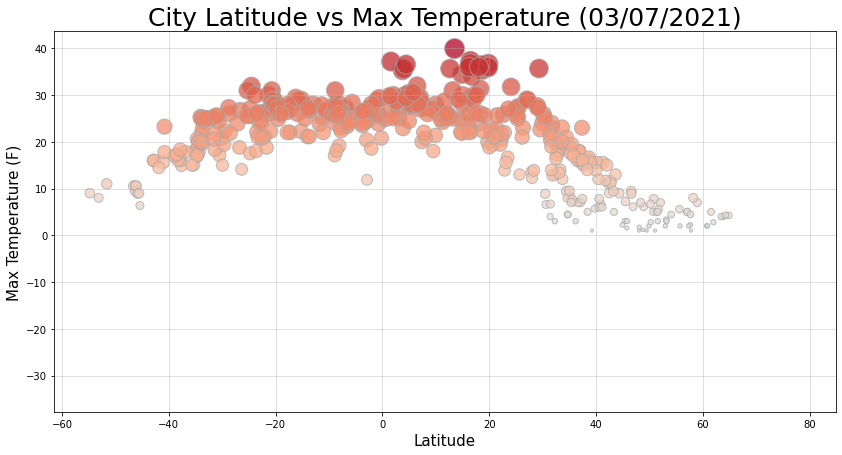

In [115]:
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.figure(figsize=(14,7), facecolor='white')

plt.scatter(x_values,y_values, s=10*y_values, c=y_values, edgecolors='darkgrey', cmap='coolwarm', alpha=.75)
plt.xlabel('Latitude', size=15)
plt.ylabel('Max Temperature (F)', size=15)
plt.title('City Latitude vs Max Temperature (03/07/2021)', size=25)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Temp')
plt.show()

The City Latitude vs Max Temperature scatterplot shows a trend of decline on temeperature for cities in the northern latitude. Cities within range of 0-20 latitude, which is slightly above the equator, shows the highest max fareinheit temperature.

### Latitude vs. Humidity Plot

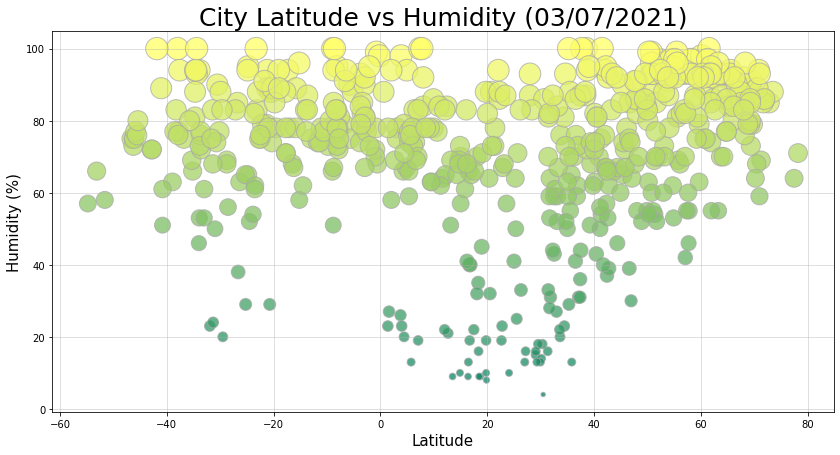

In [116]:
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.figure(figsize=(14,7), facecolor='white')

plt.scatter(x_values,y_values,s=5*y_values, c=y_values, edgecolors='darkgrey', cmap='summer', alpha=.75)
plt.xlabel('Latitude', size=15)
plt.ylabel('Humidity (%)', size=15)
plt.title('City Latitude vs Humidity (03/07/2021)', size=25)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Hum')
plt.show()

The City Latitude vs Humidity scatterplot shows high humidity rate doesn't have any correlation on where the city latitude falls into. However comparing the number of cities that has high humidity rate vs number of city with low humitdity rate, the plot shows that there are more number of cities that has higher humidity rate, which is 60%. 


### Latitude vs. Cloudiness Plot

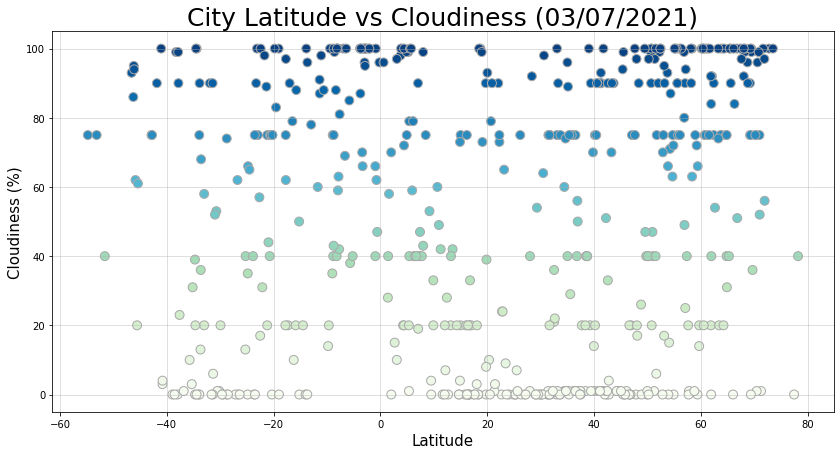

In [102]:
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.figure(figsize=(14,7))
plt.scatter(x_values,y_values, s=80, c=y_values, edgecolors='darkgrey', cmap='GnBu')
plt.xlabel('Latitude', size=15)
plt.ylabel('Cloudiness (%)', size=15)
plt.title('City Latitude vs Cloudiness (03/07/2021)', size=25)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Cloud')
plt.show()

The City Latitude vs Cloudiness scatterplot shows rate of cloudiness doesn't have any correlation on where the city latitude falls into. However, the plot shows most cities either have really low rate or really high rate of cloudiness, as compare to an average clousiness rate. 

### Latitude vs. Wind Speed Plot

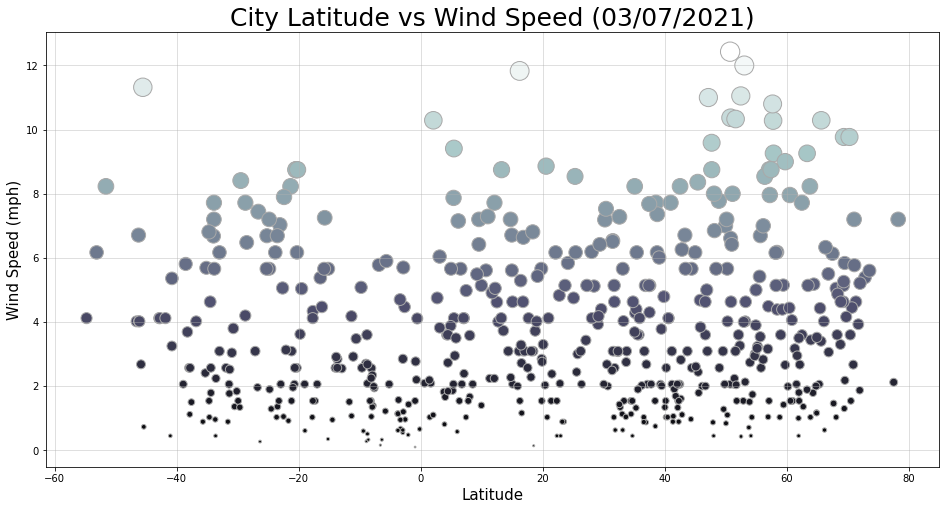

In [103]:
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.figure(figsize=(16,8))
plt.scatter(x_values,y_values, s=30*y_values, c=y_values, edgecolors='darkgrey', cmap='bone')
plt.xlabel('Latitude', size=15)
plt.ylabel('Wind Speed (mph)', size=15)
plt.title('City Latitude vs Wind Speed (03/07/2021)', size=25)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Wind')
plt.show()

The City Latitude vs Wind Speed scatterplot shows rate of wind speed doesn't have any correlation on where the city latitude falls into. The only weak trend that can be concluded is that most of the cities with the highest wind speed of above 10 mph is found in the northern latitude.

## Linear Regression

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [104]:
NHemisphere = weather_data.loc[weather_data['Lat'] > 0]

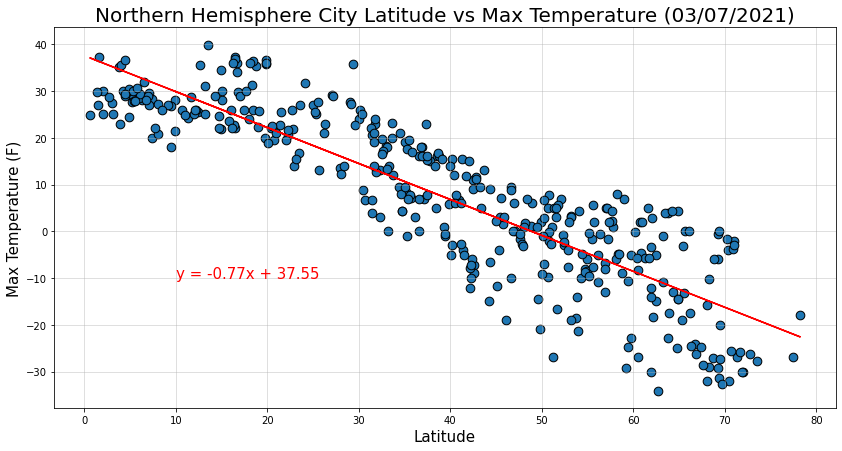

The r-value is: -0.8759226518842804


In [105]:
x_values = NHemisphere['Lat']
y_values = NHemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,7))
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Max Temperature (F)', size=15)
plt.title('Northern Hemisphere City Latitude vs Max Temperature (03/07/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Temp-N')
plt.show()

print(f"The r-value is: {rvalue}")

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [90]:
SHemisphere = weather_data.loc[weather_data['Lat'] < 0]

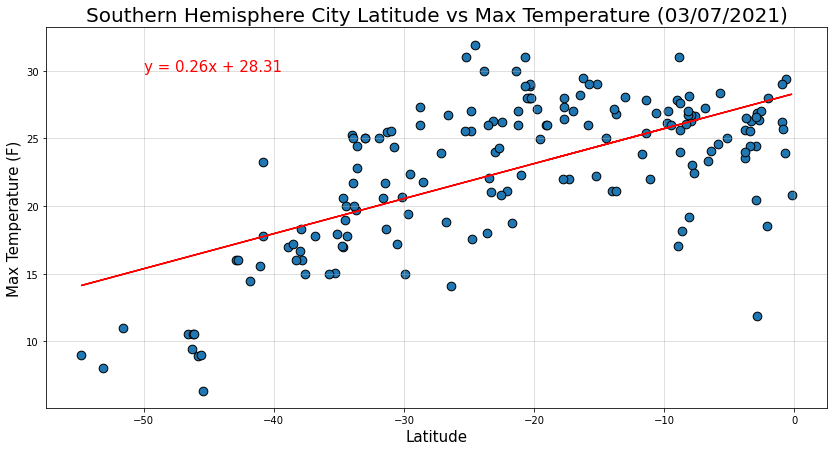

The r-value is: 0.6433183128526865


In [106]:
x_values = SHemisphere['Lat']
y_values = SHemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,7))
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Max Temperature (F)', size=15)
plt.title('Southern Hemisphere City Latitude vs Max Temperature (03/07/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Temp-S')
plt.show()

print(f"The r-value is: {rvalue}")

#### Northern Hemisphere & Southern Hemisphere - Temperature (F) vs. Latitude Comparison

- N. Hemisphere shows a strong negative linear association between the temperature and latitude.
- S. Hemisphere shows a moderetaly strong positive linear association between the temperature and latitude with a few potential outliers. 

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

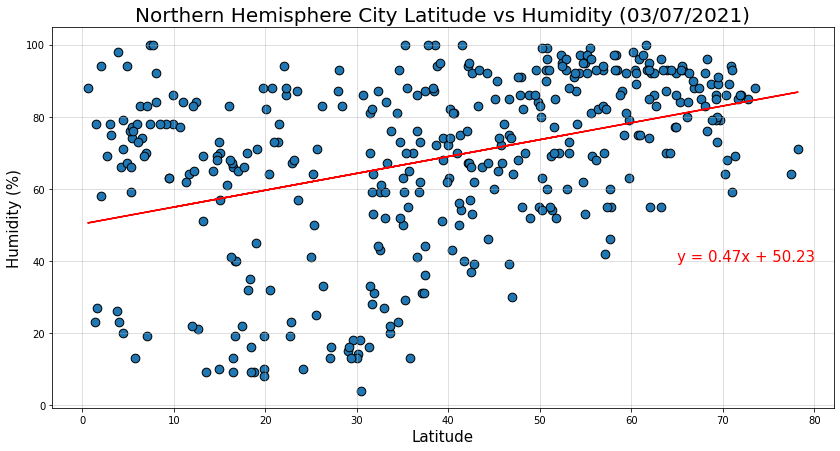

The r-value is: 0.3904209187169228


In [107]:
x_values = NHemisphere['Lat']
y_values = NHemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,7))
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(65,40),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Humidity (%)', size=15)
plt.title('Northern Hemisphere City Latitude vs Humidity (03/07/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Hum-N')
plt.show()

print(f"The r-value is: {rvalue}")

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

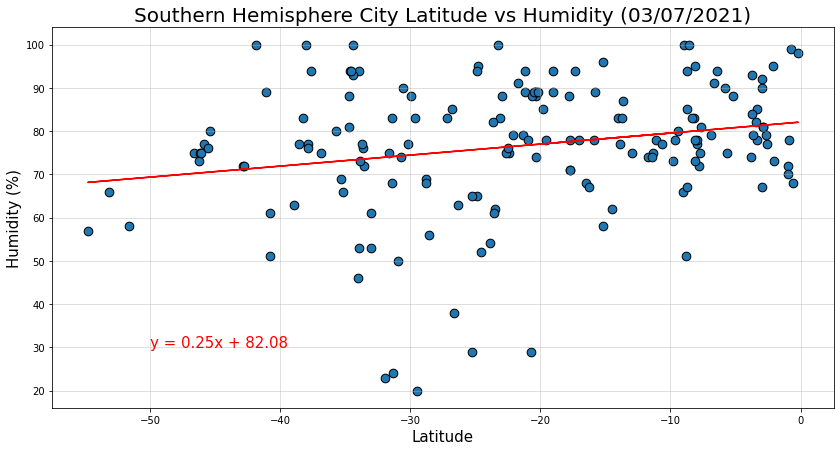

The r-value is: 0.22626141329848237


In [108]:
x_values = SHemisphere['Lat']
y_values = SHemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,7))
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Humidity (%)', size=15)
plt.title('Southern Hemisphere City Latitude vs Humidity (03/07/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Hum-S')
plt.show()

print(f"The r-value is: {rvalue}")

#### Northern Hemisphere & Southern Hemisphere - Temperature (F) vs. Humidity Comparison

- N. Hemisphere shows a weak positive linear association between the humidity and latitude. The closer to the equator, the greater the outliers.
- S. Hemisphere shows a very weak positive linear association between the temperature and latitude with a few outliers. 

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

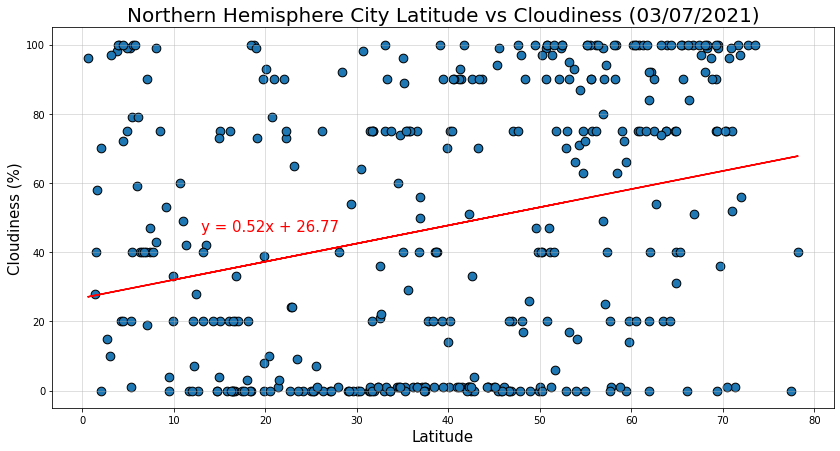

The r-value is: 0.2698214117471629


In [109]:
x_values = NHemisphere['Lat']
y_values = NHemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,7))
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(13,46),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Cloudiness (%)', size=15)
plt.title('Northern Hemisphere City Latitude vs Cloudiness (03/07/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Cloud-N')
plt.show()

print(f"The r-value is: {rvalue}")

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

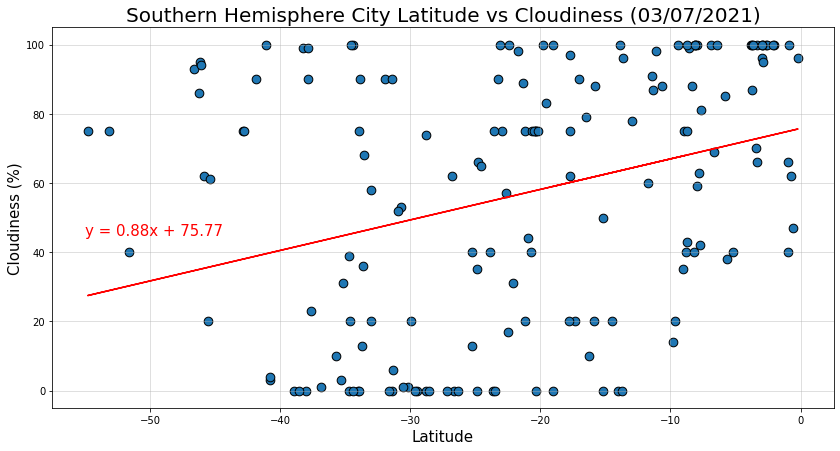

The r-value is: 0.32042116155558265


In [110]:
x_values = SHemisphere['Lat']
y_values = SHemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,7))
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,45),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Cloudiness (%)', size=15)
plt.title('Southern Hemisphere City Latitude vs Cloudiness (03/07/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Cloud-S')
plt.show()

print(f"The r-value is: {rvalue}")

#### Northern Hemisphere & Southern Hemisphere -  Cloudiness (%) vs. Latitude Comparison

Both plot shows weak positive linear association between the humidity and cloudiness. 

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

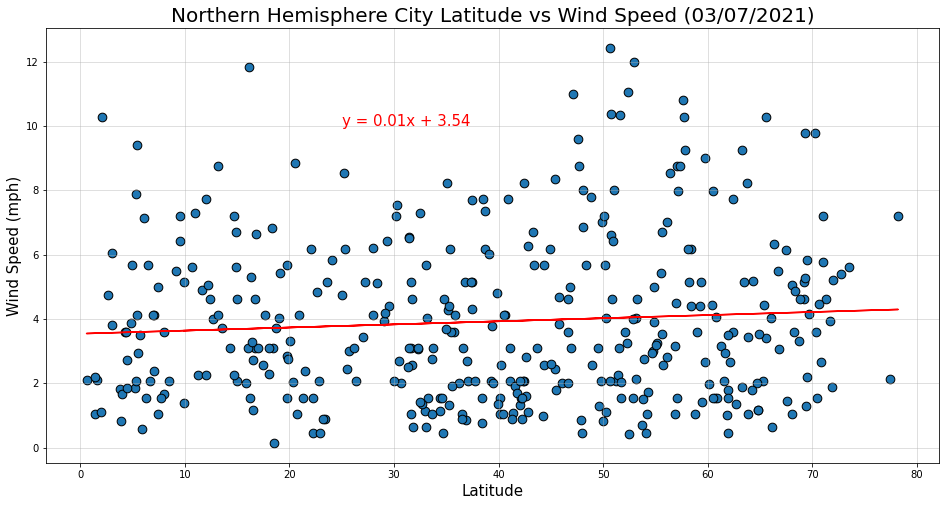

The r-value is: 0.07669520155463977


In [111]:
x_values = NHemisphere['Lat']
y_values = NHemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(16,8))
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,10),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Wind Speed (mph)', size=15)
plt.title('Northern Hemisphere City Latitude vs Wind Speed (03/07/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Wind-N')
plt.show()

print(f"The r-value is: {rvalue}")

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

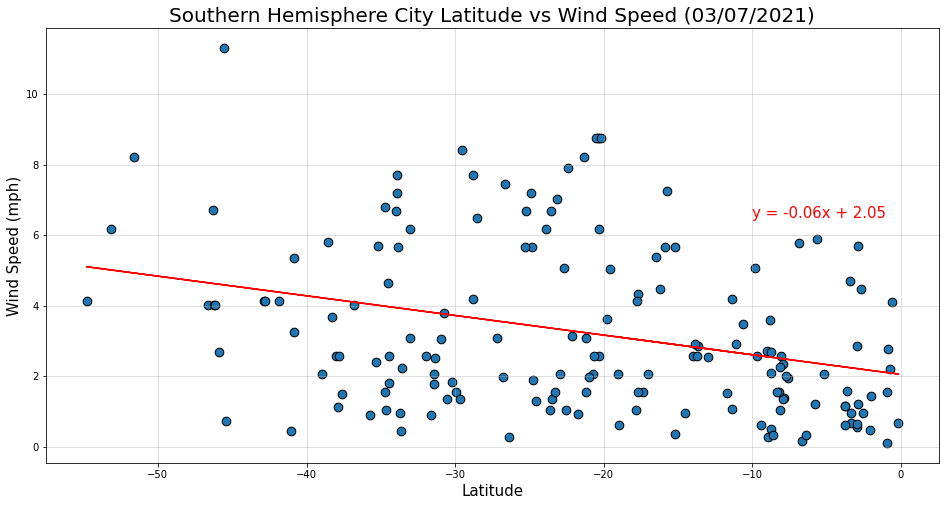

The r-value is: -0.31621345260208567


In [112]:
x_values = SHemisphere['Lat']
y_values = SHemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(16,8))
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,6.5),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Wind Speed (mph)', size=15)
plt.title('Southern Hemisphere City Latitude vs Wind Speed (03/07/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Wind-S')
plt.show()

print(f"The r-value is: {rvalue}")

#### Northern Hemisphere & Southern Hemisphere - Latitude vs Wind Speed Comparison

- N. Hemisphere shows no relationship between the latitude and the wind speed.
- S. Hemisphere shows a very weak negative linear association between the latitude and the wind speed with a few outliers.